<a href="https://colab.research.google.com/github/alxfernandes/imersao_dados_4_alura/blob/main/Imersao_dados_4_aula_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Desafios
---



In [14]:
#Importando dependedências

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#carregando dataset
url = 'https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv'
dados = pd.read_csv(url)

In [162]:
#limpeza de dados da coluna Valor
dados[['Moeda','Valor_anuncio','Tipo_anuncio']] = dados['Valor'].str.split(expand = True)

#criação de um novo dataset apenas com os imóveis com tipo de anuncio = NaN (indicam que o valor é de venda e não aluguel)
dados_vendas = dados[dados['Tipo_anuncio'].isnull()]

#Correção do valor do anuncio para numérico 
dados_vendas['Valor_anuncio'] = dados_vendas['Valor_anuncio'].str.replace('.','').astype(float)
dados_vendas['valor_m2_imovel'] = dados_vendas['Valor_anuncio'] / dados_vendas['Metragem']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main

#Desafio 01 - Criar uma escala de valores em milhões

In [20]:
dados_vendas['Valor_milhoes'] = dados_vendas['Valor_anuncio'] / 1000000
dados_vendas.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_milhoes
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7000000.0,None,7.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3700000.0,None,3.700
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380000.0,None,0.380
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685000.0,None,0.685
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540000.0,None,0.540


#Desafio 02 - Deixar o gráfico do histograma de valores legível (alterar labels, cores, título, escala)

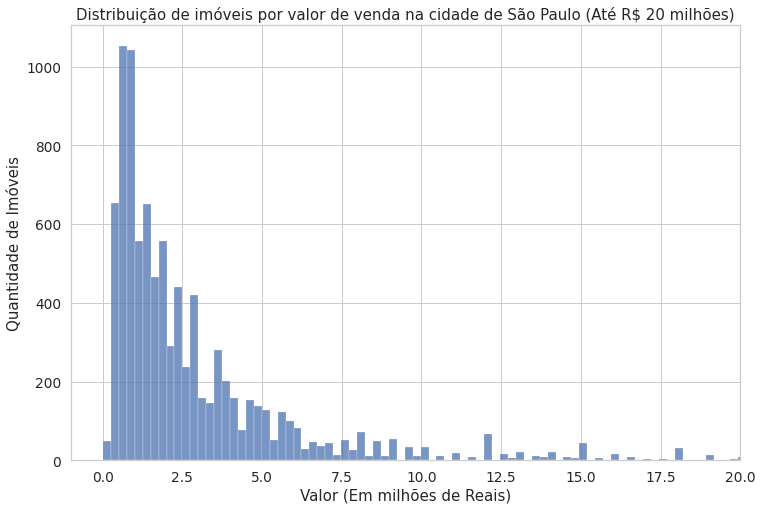

In [61]:
sns.set(style = 'whitegrid', font_scale=1.25) 
plt.figure(figsize=(12,8))
sns.color_palette("rocket")
ax = sns.histplot(data = dados_vendas, x = 'Valor_milhoes')
ax.set_title('Distribuição de imóveis por valor de venda na cidade de São Paulo')
ax.set_xlabel('Valor (Em milhões de Reais)')
ax.set_ylabel('Quantidade de Imóveis')

plt.xlim((-1,20))
plt.show()

#Desafio 03 - Preço do metro quadrado por bairro e plotar em um gráfico ideal

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


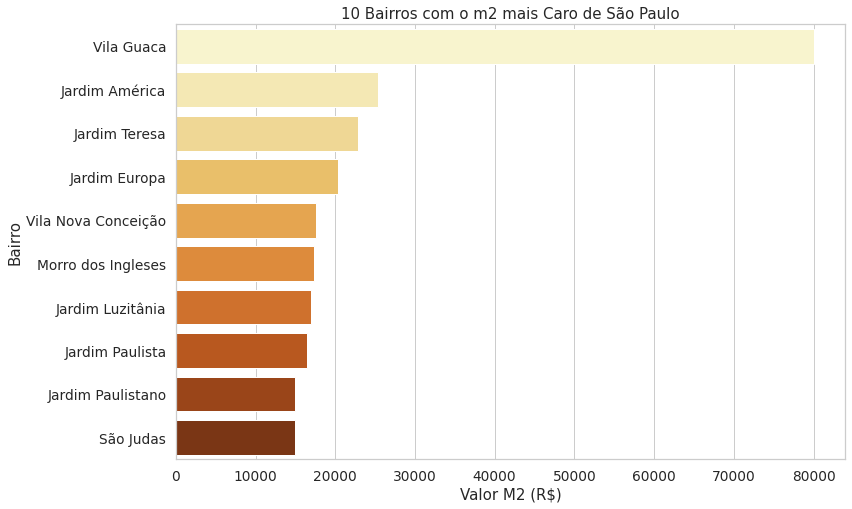

In [161]:
df_valor_m2_bairros = dados_vendas.groupby('Bairro', as_index=False)['Valor_anuncio','Metragem'].sum()

df_valor_m2_bairros['valor_m2'] = df_valor_m2_bairros['Valor_anuncio'] / df_valor_m2_bairros['Metragem']
df_valor_m2_bairros.sort_values('valor_m2', ascending=False, inplace=True)


plt.figure(figsize=(12,8))
ax = sns.barplot(y='Bairro',x='valor_m2',data=df_valor_m2_bairros.head(10), orient='h', palette="YlOrBr")
ax.set_title('10 Bairros com o m2 mais Caro de São Paulo')
ax.set_xlabel("Valor M2 (R$)")
ax.set_ylabel("Bairro")
plt.show()

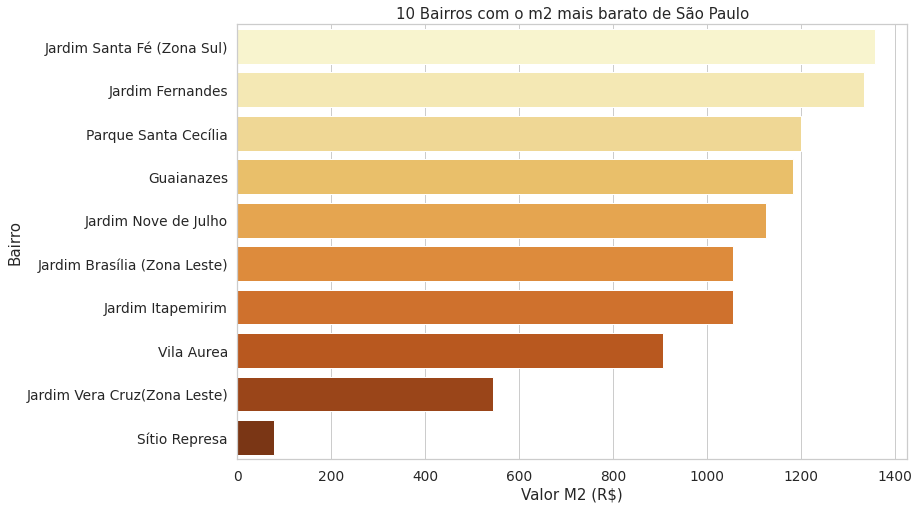

In [158]:

plt.figure(figsize=(12,8))
ax = sns.barplot(y='Bairro',x='valor_m2',data=df_valor_m2_bairros.tail(10), orient='h', palette="YlOrBr")
ax.set_title('10 Bairros com o m2 mais barato de São Paulo')
ax.set_xlabel("Valor M2 (R$)")
ax.set_ylabel("Bairro")
plt.show()

#Desafio 04 - Explorar as bibliotecas de visualizações e colocar as suas conclusões

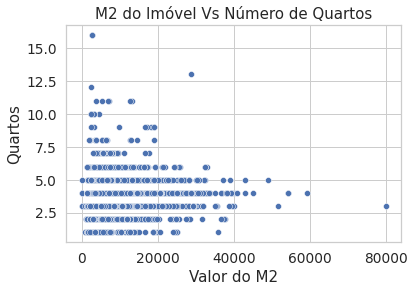

In [167]:
ax = sns.scatterplot(x="valor_m2_imovel", y="Quartos", data=dados_vendas,  palette="ch:r=-.2,d=.3_r")
ax.set_title('M2 do Imóvel Vs Número de Quartos')
ax.set_xlabel("Valor do M2 (R$)")
ax.set_ylabel("Quartos")
plt.show()

#Conclusão: o valor do m2 não é diretamente proporcional à quantidade de quartos do imóvel

#Desafio 05 - Pesquisar um visualização para analisar os quartis, mediana e outliers

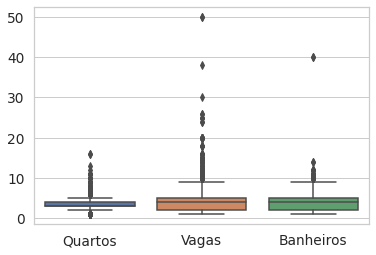

In [156]:
ax = sns.boxplot(data=dados_vendas[['Quartos','Vagas','Banheiros']])

In [ ]:
ax = sns.boxplot(data=dados_vendas[['Quartos','Vagas','Banheiros']])